In [85]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.mixture import GaussianMixture



energy dataset

In [2]:
data=pd.read_csv("energydata_complete.csv")
data=data.drop(['date'],axis=1)
data=(data-data.mean())/data.std()
y=data.Appliances

df=data.drop(['Appliances'],axis=1)
a=np.array([])
for i in range(len(y)):
    
    if y[i]>=(y.median(axis=0)):
        a=np.append(a,1)
    elif y[i]<(y.median(axis=0)):
        a=np.append(a,0)
df=df.assign(Class=a) 
y=df.Class

df=df.drop(['Class'],axis=1)



Mushroom dataset

In [36]:
from sklearn.preprocessing import OneHotEncoder 
onehotencoder = OneHotEncoder() 
data_mushroom=pd.read_csv("mushrooms.csv")
y_mushroom=data_mushroom.target
y_mushroom=pd.DataFrame(y_mushroom)
df_mushroom=data_mushroom.drop(['target'],axis=1)
df_mushroom = onehotencoder.fit_transform(df_mushroom).toarray() 
y_mushroom = onehotencoder.fit_transform(y_mushroom).toarray()

K Means Clustering

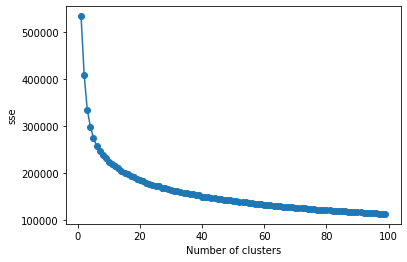

In [83]:


sse = []
for i in range(1,100,1):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df)
    sse.append(km.inertia_)

# plot
plt.plot(range(1, 100,1), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('sse')
plt.show()

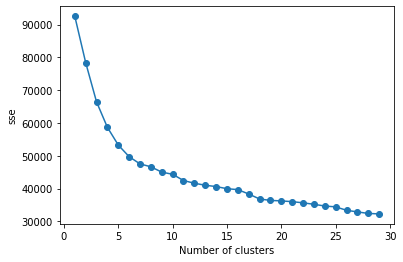

In [5]:
sse = []
for i in range(1,30,1):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df_mushroom)
    sse.append(km.inertia_)

# plot
plt.plot(range(1, 30,1), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('sse')
plt.show()

Expectation maximization

In [ ]:
from sklearn.mixture import GaussianMixture
n_components = np.arange(1,100,1)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(df) for n in n_components]
plt.plot(n_components, [m.bic(df) for m in models], label='BIC')
plt.plot(n_components, [m.aic(df) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.show()

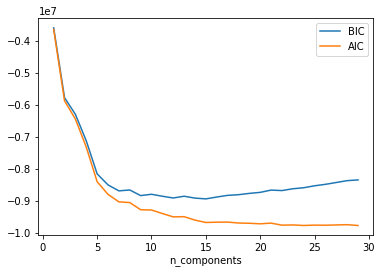

In [7]:
n_components = np.arange(1,30,1)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(df_mushroom) for n in n_components]
plt.plot(n_components, [m.bic(df_mushroom) for m in models], label='BIC')
plt.plot(n_components, [m.aic(df_mushroom) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.show()




Feature selection 

[0, 3, 9, 10, 12, 16, 18, 19, 20, 24, 25, 26]


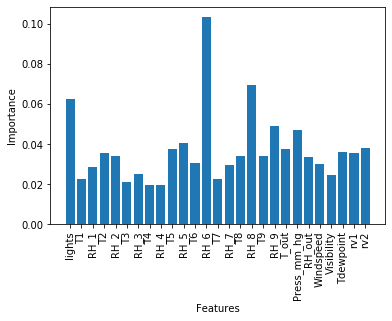

In [8]:
from sklearn.tree import DecisionTreeClassifier

clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy",random_state=30)

clf_entropy= clf_entropy.fit(df,y)
features=[]
features_tree=[]
features=clf_entropy.feature_importances_
plt.bar(df.columns,features)
plt.xlabel("Features")
plt.xticks(rotation='vertical')
plt.ylabel("Importance")
for i in range(len(features)):
    if features[i]>0.035:
        features_tree.append(i)

print(features_tree)
df_trees=df.iloc[:,features_tree]







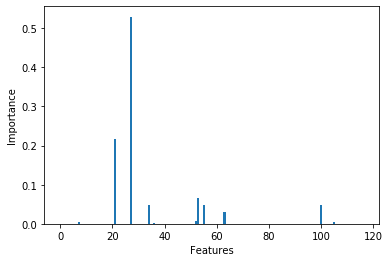

[7, 21, 27, 34, 36, 52, 53, 55, 63, 100, 105]


In [9]:
from sklearn.tree import DecisionTreeClassifier

clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy",random_state=30)

clf_entropy= clf_entropy.fit(df_mushroom,y_mushroom)
featuresm=[]
features_treem=[]
featuresm=clf_entropy.feature_importances_
df_m=pd.DataFrame(df_mushroom)
plt.bar(df_m.columns,featuresm)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()
for i in range(len(featuresm)):
    if featuresm[i]>0:
        features_treem.append(i)

print(features_treem)
df_mushroom=pd.DataFrame(df_mushroom)
df_treesm=df_mushroom.iloc[:,features_treem]







PCA

[3.45300061e-01 2.61583832e-01 7.43448143e-02 6.71394613e-02
 4.20808101e-02 3.86692805e-02 3.62184066e-02 3.10998123e-02
 2.06473378e-02 1.95705111e-02 1.44000200e-02 8.98439214e-03
 6.57435493e-03 5.31326383e-03 5.16781955e-03 4.33816108e-03
 4.13281457e-03 3.47927605e-03 2.67803721e-03 2.48703359e-03
 1.68059966e-03 1.55531293e-03 1.05131803e-03 8.35193183e-04
 5.30699293e-04 1.37376378e-04 2.13157373e-33]


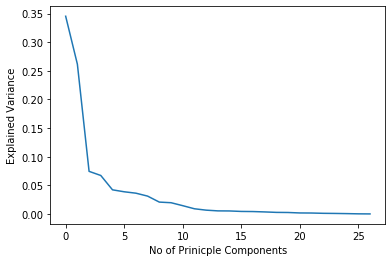

       principal component 1  principal component 2principal component 3  \
0                  -2.913877                                   -4.689395   
1                  -2.932303                                   -4.618324   
2                  -2.973068                                   -4.533006   
3                  -3.064415                                   -4.511783   
4                  -3.042880                                   -4.487575   
...                      ...                                         ...   
19730               7.996876                                   -2.572249   
19731               7.921825                                   -2.553421   
19732               7.823556                                   -2.714423   
19733               7.707573                                   -2.712594   
19734               7.587044                                   -2.671837   

       principal component 4  principal component 5  principal component 6  \
0        

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=27)
pca.fit(df)
pc=[]
pc=pca.explained_variance_ratio_
print(pc)
plt.plot(pc)
plt.ylabel("Explained Variance")
plt.xlabel("No of Prinicple Components")
plt.show()

pca = PCA(n_components=7)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'
                         'principal component 3', 'principal component 4',
                         'principal component 5', 'principal component 6',
                         'principal component 7', 'principal component 8'
                         ])
print(principalDf)

[1.68108789e-01 1.38897553e-01 9.74494268e-02 6.34083903e-02
 4.01856294e-02 3.68525228e-02 3.13346600e-02 2.77481764e-02
 2.65322923e-02 2.07680656e-02 2.04826964e-02 1.85803543e-02
 1.78749805e-02 1.69589242e-02 1.53113936e-02 1.52811030e-02
 1.46809938e-02 1.40385094e-02 1.33260653e-02 1.15363935e-02
 1.07834546e-02 1.06779518e-02 1.03674489e-02 9.46689019e-03
 8.72529767e-03 8.58520459e-03 8.20278942e-03 7.63751113e-03
 7.32156663e-03 6.98258696e-03 6.55050445e-03 6.22387380e-03
 6.02700452e-03 5.50974164e-03 5.30004977e-03 5.15691310e-03
 4.74052884e-03 4.57592245e-03 4.32213459e-03 4.30143672e-03
 4.09712254e-03 3.79011479e-03 3.54597153e-03 3.43780452e-03
 3.29474247e-03 3.05930374e-03 2.70636194e-03 2.32103588e-03
 2.20506855e-03 2.03908763e-03 1.85087093e-03 1.69154917e-03
 1.49829345e-03 1.24975113e-03 1.19655866e-03 1.08539677e-03
 1.03731230e-03 8.97999532e-04 7.63925867e-04 6.76586763e-04
 6.45964236e-04 5.84272116e-04 5.74951569e-04 5.70056147e-04
 5.18656150e-04 5.186561

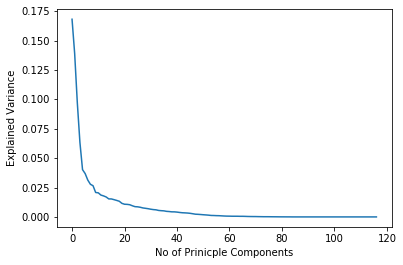

      principal component 1  principal component 2  principal component 3  \
0                 -0.996245              -0.946892               0.802495   
1                 -1.441732              -0.164154               1.068175   
2                 -1.524085              -0.408746               0.853167   
3                 -1.151800              -0.675820               0.629842   
4                 -0.617503              -0.996143               1.725886   
...                     ...                    ...                    ...   
8119              -0.126657              -0.410460               0.340035   
8120              -0.071756              -0.367338               0.137015   
8121              -0.287817              -0.326214               0.274664   
8122               1.930433              -1.573163              -0.115746   
8123              -0.249297              -0.312292               0.361869   

      principal component 4  principal component 5  principal component 6  

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=117)
pca.fit(df_mushroom)
pc=[]
pc=pca.explained_variance_ratio_
print(pc)
plt.plot(pc)
plt.ylabel("Explained Variance")
plt.xlabel("No of Prinicple Components")
plt.show()

pca = PCA(n_components=25)
principalComponents = pca.fit_transform(df_mushroom)
principalDfm = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2',
                         'principal component 3', 'principal component 4',
                         'principal component 5', 'principal component 6',
                         'principal component 7', 'principal component 8',
                          'principal component 9', 'principal component 10',
                         'principal component 11', 'principal component 12',
                         'principal component 13', 'principal component 14',
                         'principal component 15', 'principal component 16',
                          'principal component 17', 'principal component 18',
                         'principal component 19', 'principal component 20',
                         'principal component 21', 'principal component 22',
                          'principal component 23', 'principal component 24',
                          'principal component 25'
                         ])
print(principalDfm)

ICA

(19735, 27) (19735, 27)
             0         1         2         3         4         5         6   \
0      0.001586  0.000343 -0.005960  0.013799 -0.002327  0.008015  0.002465   
1      0.001724  0.000517 -0.007041  0.007275 -0.002379  0.006581 -0.000514   
2      0.000865  0.000836 -0.007513  0.005025 -0.002124  0.006082 -0.003944   
3      0.000164  0.000990 -0.006061  0.003577 -0.001441  0.007214 -0.008572   
4      0.000040  0.000752 -0.005243  0.005822 -0.002149  0.005572  0.002761   
...         ...       ...       ...       ...       ...       ...       ...   
19730 -0.006194 -0.008083  0.001924  0.006225 -0.001384 -0.006773  0.004404   
19731 -0.008083 -0.007558  0.000928  0.006012 -0.001151 -0.006225  0.001043   
19732 -0.009930 -0.007796  0.003303  0.003867 -0.002027 -0.006573  0.005434   
19733 -0.013909 -0.007580  0.002884  0.007759 -0.002694 -0.007000  0.009665   
19734 -0.019017 -0.006742  0.001097  0.006443 -0.002279 -0.006210 -0.002415   

             7         8   

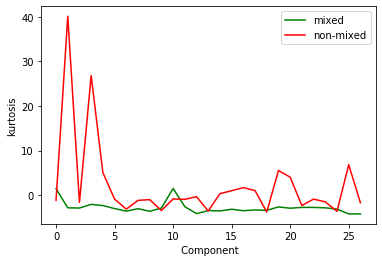

Int64Index([1, 3, 4, 14, 15, 16, 17, 19, 20, 25], dtype='int64')

In [12]:
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis

kurto=[]
kurtos=[]
transformer = FastICA(whiten=True,max_iter=2000, tol=0.01,random_state=250)
df_ica= transformer.fit_transform(df)
print(df_ica.shape,df.shape)
df_ica=pd.DataFrame(df_ica)
print(df_ica)

plt.plot(kurtosis(df)-3,color='green',label='mixed')
plt.plot(kurtosis(df_ica)-3,color='red',label='non-mixed')
plt.xlabel(" Component")
plt.ylabel("kurtosis")
plt.legend(loc='best')
plt.show()


kurto=(kurtosis(df_ica)-3)
for i in range(len(kurto)):
    if kurto[i]>0:
        kurtos.append(i)

df_ica=df_ica.iloc[:,kurtos]
df_ica.columns








           0         1         2         3         4         5         6    \
0    -0.001277 -0.010548 -0.006156  0.008025  0.004851 -0.022534  0.022388   
1    -0.014217 -0.024434 -0.015555  0.009767  0.014704 -0.014661 -0.016309   
2    -0.016536 -0.029866 -0.035590  0.031221 -0.042638 -0.011487 -0.016309   
3     0.028996 -0.011525 -0.007132  0.008025  0.005828 -0.026440  0.022388   
4    -0.014461  0.011699  0.003000 -0.001952  0.015681 -0.019544 -0.016797   
...        ...       ...       ...       ...       ...       ...       ...   
8119 -0.023738  0.021953  0.000711 -0.023253 -0.086034  0.005847  0.018115   
8120 -0.013484  0.006328 -0.008567 -0.016417 -0.074804  0.007800  0.038623   
8121 -0.043270 -0.050313 -0.048117  0.037294 -0.013769  0.021472  0.016162   
8122  0.029484  0.013164  0.039773 -0.035949  0.028712 -0.022473  0.020068   
8123 -0.029018  0.030391  0.007730 -0.015038 -0.013368  0.012141 -0.005811   

           7         8         9    ...       107       108    

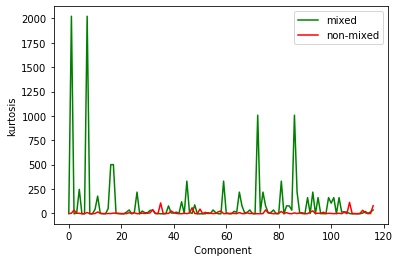

Int64Index([  1,   2,   3,   4,   7,  11,  12,  17,  18,  23,  25,  28,  30,
             31,  32,  35,  39,  40,  44,  46,  47,  50,  52,  54,  57,  58,
             62,  65,  68,  75,  76,  80,  81,  83,  86,  88,  92,  93,  95,
             97,  99, 103, 105, 107, 112, 113, 116],
           dtype='int64')

In [13]:
from sklearn.decomposition import FastICA

kurto=[]
kurtos=[]
transformer = FastICA(whiten=True,max_iter=2000, tol=0.01,random_state=250)
#df_mushrooms=(df_mushroom-df_mushroom.mean())/df_mushroom.std()
df_icam= transformer.fit_transform(df_mushroom)
#print(df_icam.shape,df_mushrooms.shape)
df_icam=pd.DataFrame(df_icam)
print(df_icam)


plt.plot(kurtosis(df_mushroom)-3,color='green',label='mixed')
plt.plot(kurtosis(df_icam)-3,color='red',label='non-mixed')
plt.xlabel(" Component")
plt.ylabel("kurtosis")
plt.legend(loc='best')
plt.show()


kurto=(kurtosis(df_icam)-3)
for i in range(len(kurto)):
    if kurto[i]>0:
        kurtos.append(i)

df_icam=df_icam.iloc[:,kurtos]
df_icam.columns

Random Projections

In [14]:
import numpy as np
from sklearn import random_projection
transformer = random_projection.SparseRandomProjection(n_components=10,eps=0.5)
df_random = transformer.fit_transform(df)
df_random.shape


(19735, 10)

In [15]:
transformer = random_projection.GaussianRandomProjection(n_components=50,eps=0.5)
df_randomm = transformer.fit_transform(df_mushroom)
df_randomm.shape

(8124, 50)

Clutering with dimensionality reduction techniques

K-means using feature selection

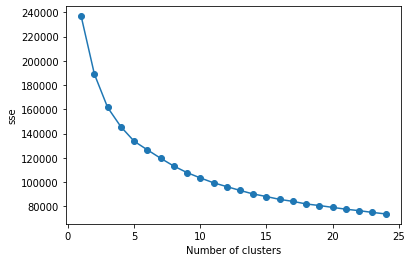

In [16]:
sse = []
for i in range(1,25,1):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df_trees)
    sse.append(km.inertia_)

# plot
plt.plot(range(1, 25,1), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('sse')
plt.show()

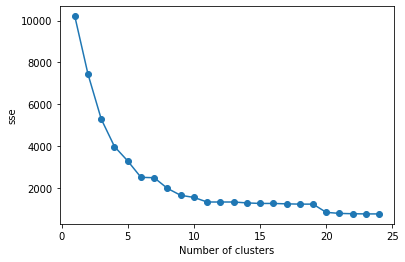

In [17]:
sse = []
for i in range(1,25,1):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df_treesm)
    sse.append(km.inertia_)

# plot
plt.plot(range(1, 25,1), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('sse')
plt.show()

K means using PCA

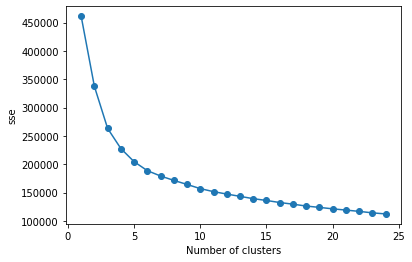

In [18]:
sse = []
for i in range(1,25,1):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(principalDf)
    sse.append(km.inertia_)

# plot
plt.plot(range(1, 25,1), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('sse')
plt.show()

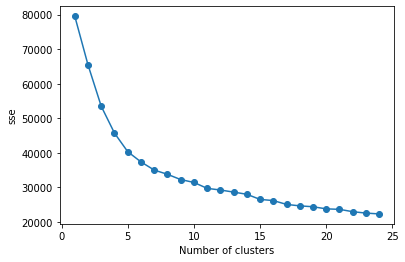

In [51]:
sse = []
for i in range(1,25,1):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(principalDfm)
    sse.append(km.inertia_)

# plot
plt.plot(range(1, 25,1), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('sse')
plt.show()

Kmeans using ICA

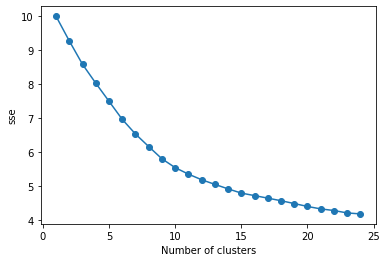

In [20]:
sse = []
for i in range(1,25,1):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df_ica)
    sse.append(km.inertia_)

# plot
plt.plot(range(1, 25,1), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('sse')
plt.show()

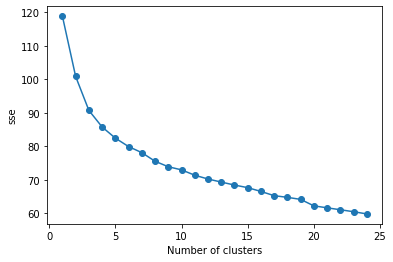

In [21]:
sse = []
for i in range(1,25,1):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df_icam)
    sse.append(km.inertia_)

# plot
plt.plot(range(1,25,1), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('sse')
plt.show()

Kmeans using random projections

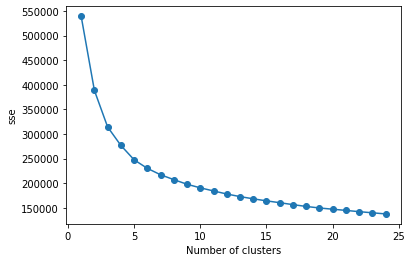

In [22]:
sse = []
for i in range(1,25,1):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df_random)
    sse.append(km.inertia_)

# plot
plt.plot(range(1,25,1), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('sse')
plt.show()

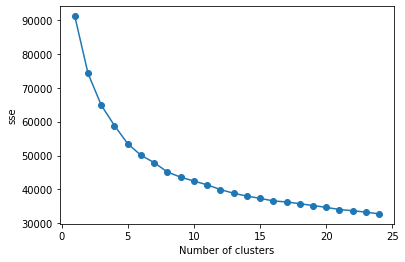

In [23]:
sse = []
for i in range(1,25,1):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df_randomm)
    sse.append(km.inertia_)

# plot
plt.plot(range(1,25,1), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('sse')
plt.show()

Expectation Maximization using dimensionality reduction techniques

EM using feature selection

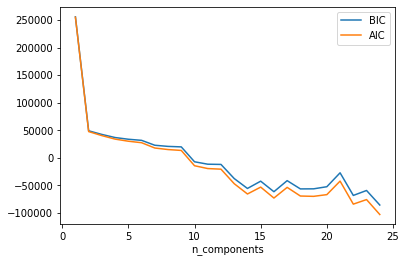

In [24]:
n_components = np.arange(1,25,1)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(df_trees) for n in n_components]
plt.plot(n_components, [m.bic(df_trees) for m in models], label='BIC')
plt.plot(n_components, [m.aic(df_trees) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.show()

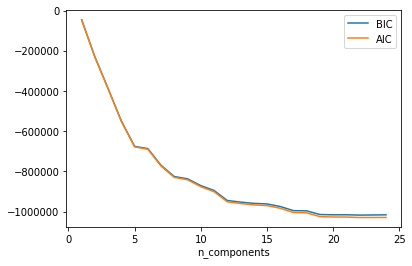

In [25]:
n_components = np.arange(1,25,1)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(df_treesm) for n in n_components]
plt.plot(n_components, [m.bic(df_treesm) for m in models], label='BIC')
plt.plot(n_components, [m.aic(df_treesm) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.show()

EM using PCA

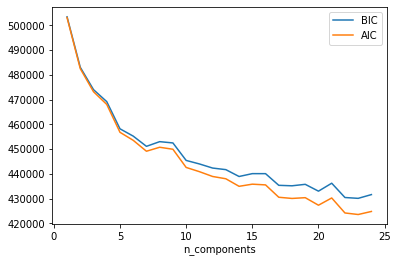

In [26]:
n_components = np.arange(1,25,1)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(principalDf) for n in n_components]
plt.plot(n_components, [m.bic(principalDf) for m in models], label='BIC')
plt.plot(n_components, [m.aic(principalDf) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.show()

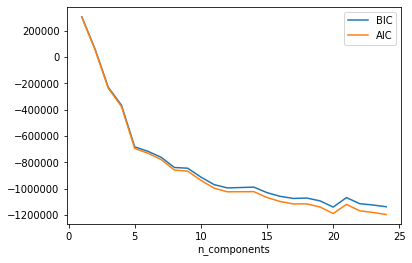

In [52]:
n_components = np.arange(1,25,1)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(principalDfm) for n in n_components]
plt.plot(n_components, [m.bic(principalDfm) for m in models], label='BIC')
plt.plot(n_components, [m.aic(principalDfm) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.show()

EM using ICA

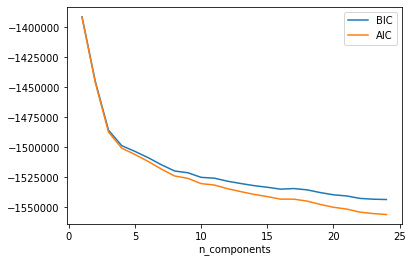

In [28]:
n_components = np.arange(1,25,1)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(df_ica) for n in n_components]
plt.plot(n_components, [m.bic(df_ica) for m in models], label='BIC')
plt.plot(n_components, [m.aic(df_ica) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.show()

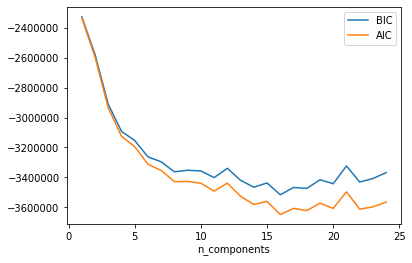

In [29]:
n_components = np.arange(1,25,1)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(df_icam) for n in n_components]
plt.plot(n_components, [m.bic(df_icam) for m in models], label='BIC')
plt.plot(n_components, [m.aic(df_icam) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.show()

EM using Random Projections

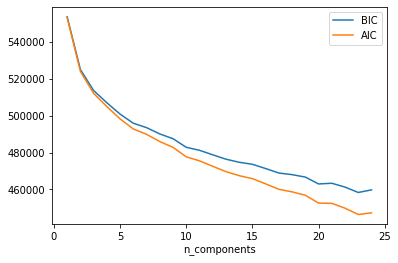

In [30]:
n_components = np.arange(1,25,1)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(df_random) for n in n_components]
plt.plot(n_components, [m.bic(df_random) for m in models], label='BIC')
plt.plot(n_components, [m.aic(df_random) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.show()

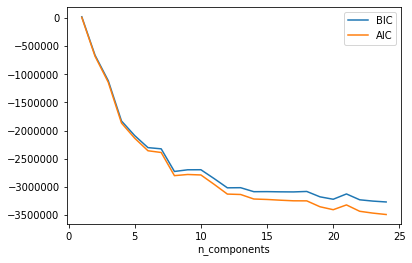

In [31]:
n_components = np.arange(1,25,1)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(df_randomm) for n in n_components]
plt.plot(n_components, [m.bic(df_randomm) for m in models], label='BIC')
plt.plot(n_components, [m.aic(df_randomm) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.show()

Neural Networks with dimensionality reduction techniques

(15788, 12) (3947, 12) (15788,) (3947,)
# Tuning  parameters for precision

Best parameters set found on development set:

{'activation': 'tanh', 'alpha': 0.01, 'batch_size': 100, 'hidden_layer_sizes': 15, 'max_iter': 100}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

         0.0       0.68      0.58      0.63      1509
         1.0       0.76      0.83      0.80      2438

    accuracy                           0.74      3947
   macro avg       0.72      0.71      0.71      3947
weighted avg       0.73      0.74      0.73      3947




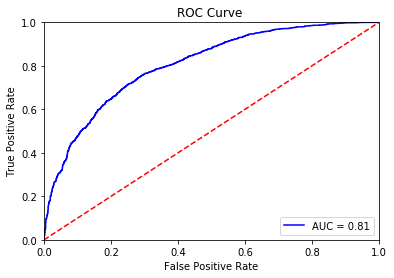

In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


X_train, X_test, y_train, y_test = train_test_split(df_trees, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

score = 'accuracy'


# Set the parameters by cross-validation
tuned_parameters = [{
                     'hidden_layer_sizes': [5, 10, 15],
                     'alpha': [0.01],
                     'activation': ["logistic", "relu", "tanh"],
                     'max_iter' : [10,50,100] ,
                     'batch_size' : [100,500]
                  
                     }]

clf = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5)
clf.fit(X_train, y_train)



def paramTuning(clf,X_train, y_train,X_test,y_test):
  
    print("# Tuning  parameters for precision" )
    print()

    
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
paramTuning(clf,X_train, y_train,X_test,y_test)

y_scores = clf.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic Feature Selection')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve ')
plt.show()

# Tuning  parameters for precision

Best parameters set found on development set:

{'activation': 'relu', 'alpha': 0.01, 'batch_size': 100, 'hidden_layer_sizes': 10, 'max_iter': 100}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       832
           1       1.00      1.00      1.00       793

   micro avg       1.00      1.00      1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625
 samples avg       1.00      1.00      1.00      1625




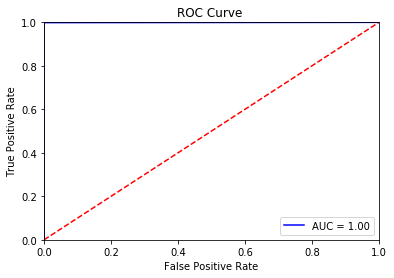

In [124]:
X_train, X_test, y_train, y_test = train_test_split(df_treesm, y_mushroom, test_size=0.2)
score = 'accuracy'


# Set the parameters by cross-validation
tuned_parameters = [{
                     'hidden_layer_sizes': [5, 10, 15],
                     'alpha': [0.01],
                     'activation': ["logistic", "relu", "tanh"],
                     'max_iter' : [10,50,100] ,
                     'batch_size' : [100,500]
                  
                     }]

clf = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5)
clf.fit(X_train, y_train)


paramTuning(clf,X_train, y_train,X_test,y_test)

y_scores = clf.predict(X_test)

fpr, tpr, threshold = roc_curve(y_test[:,1], y_scores[:,1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic Feature selection')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve ')
plt.show()

# Tuning  parameters for precision

Best parameters set found on development set:

{'activation': 'tanh', 'alpha': 0.01, 'batch_size': 100, 'hidden_layer_sizes': 15, 'max_iter': 100}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

         0.0       0.67      0.58      0.62      1486
         1.0       0.76      0.83      0.80      2461

    accuracy                           0.73      3947
   macro avg       0.72      0.70      0.71      3947
weighted avg       0.73      0.73      0.73      3947




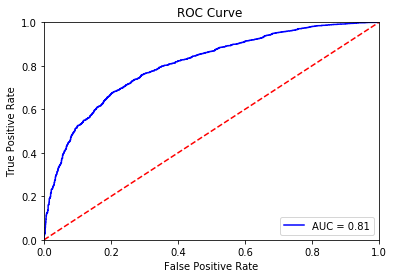

In [43]:
X_train, X_test, y_train, y_test = train_test_split(principalDf, y, test_size=0.2)
score = 'accuracy'


# Set the parameters by cross-validation
tuned_parameters = [{
                     'hidden_layer_sizes': [5, 10, 15],
                     'alpha': [0.01],
                     'activation': ["logistic", "relu", "tanh"],
                     'max_iter' : [10,50,100] ,
                     'batch_size' : [100,500]
                  
                     }]

clf = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5)
clf.fit(X_train, y_train)


paramTuning(clf,X_train, y_train,X_test,y_test)

y_scores = clf.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic PCA')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve ')
plt.show()

# Tuning  parameters for precision

Best parameters set found on development set:

{'activation': 'relu', 'alpha': 0.01, 'batch_size': 100, 'hidden_layer_sizes': 10, 'max_iter': 100}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       855
           1       1.00      1.00      1.00       770

   micro avg       1.00      1.00      1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625
 samples avg       1.00      1.00      1.00      1625




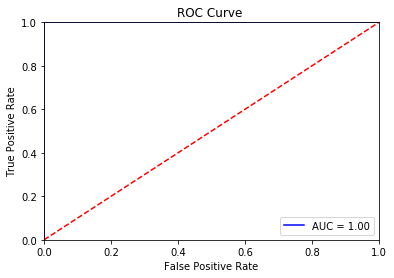

In [53]:

X_train, X_test, y_train, y_test = train_test_split(principalDfm, y_mushroom, test_size=0.2)
score = 'accuracy'


# Set the parameters by cross-validation
tuned_parameters = [{
                     'hidden_layer_sizes': [5, 10, 15],
                     'alpha': [0.01],
                     'activation': ["logistic", "relu", "tanh"],
                     'max_iter' : [10,50,100] ,
                     'batch_size' : [100,500]
                  
                     }]

clf = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5)
clf.fit(X_train, y_train)

paramTuning(clf,X_train, y_train,X_test,y_test)

y_scores = clf.predict(X_test)
fpr, tpr, threshold = roc_curve(y_test[:,1], y_scores[:,1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic PCA')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve ')
plt.show()

# Tuning  parameters for precision

Best parameters set found on development set:

{'activation': 'relu', 'alpha': 0.01, 'batch_size': 100, 'hidden_layer_sizes': 15, 'max_iter': 100}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

         0.0       0.53      0.36      0.43      1431
         1.0       0.69      0.82      0.75      2516

    accuracy                           0.65      3947
   macro avg       0.61      0.59      0.59      3947
weighted avg       0.63      0.65      0.63      3947




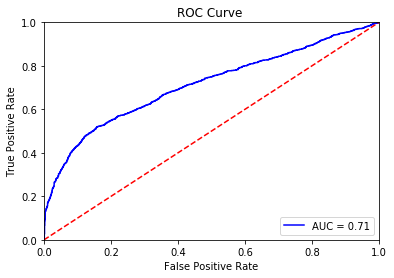

In [46]:
X_train, X_test, y_train, y_test = train_test_split(df_ica, y, test_size=0.2)
score = 'accuracy'


# Set the parameters by cross-validation
tuned_parameters = [{
                     'hidden_layer_sizes': [5, 10, 15],
                     'alpha': [0.01],
                     'activation': ["logistic", "relu", "tanh"],
                     'max_iter' : [10,50,100] ,
                     'batch_size' : [100,500]
                  
                     }]

clf = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5)
clf.fit(X_train, y_train)


paramTuning(clf,X_train, y_train,X_test,y_test)

y_scores = clf.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic ICA')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve ')
plt.show()

# Tuning  parameters for precision

Best parameters set found on development set:

{'activation': 'tanh', 'alpha': 0.01, 'batch_size': 100, 'hidden_layer_sizes': 15, 'max_iter': 100}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       831
           1       0.97      0.98      0.98       794

   micro avg       0.98      0.98      0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625
 samples avg       0.98      0.98      0.98      1625




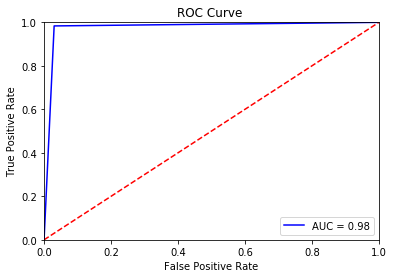

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df_icam, y_mushroom, test_size=0.2)
score = 'accuracy'


# Set the parameters by cross-validation
tuned_parameters = [{
                     'hidden_layer_sizes': [5, 10, 15],
                     'alpha': [0.01],
                     'activation': ["logistic", "relu", "tanh"],
                     'max_iter' : [10,50,100] ,
                     'batch_size' : [100,500]
                  
                     }]

clf = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5)
clf.fit(X_train, y_train)


paramTuning(clf,X_train, y_train,X_test,y_test)

y_scores = clf.predict(X_test)
fpr, tpr, threshold = roc_curve(y_test[:,1], y_scores[:,1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic ICA')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve ')
plt.show()

# Tuning  parameters for precision

Best parameters set found on development set:

{'activation': 'relu', 'alpha': 0.01, 'batch_size': 100, 'hidden_layer_sizes': 15, 'max_iter': 100}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

         0.0       0.68      0.61      0.64      1476
         1.0       0.78      0.82      0.80      2471

    accuracy                           0.74      3947
   macro avg       0.73      0.72      0.72      3947
weighted avg       0.74      0.74      0.74      3947




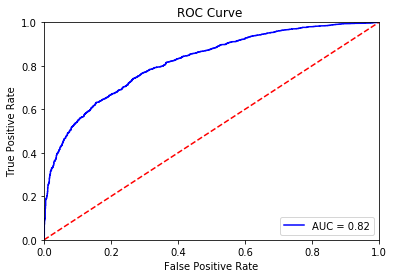

In [48]:
X_train, X_test, y_train, y_test = train_test_split(df_random, y, test_size=0.2)
score = 'accuracy'


# Set the parameters by cross-validation
tuned_parameters = [{
                     'hidden_layer_sizes': [5, 10, 15],
                     'alpha': [0.01],
                     'activation': ["logistic", "relu", "tanh"],
                     'max_iter' : [10,50,100] ,
                     'batch_size' : [100,500]
                  
                     }]

clf = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5)
clf.fit(X_train, y_train)


paramTuning(clf,X_train, y_train,X_test,y_test)

y_scores = clf.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic Random')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve ')
plt.show()

# Tuning  parameters for precision

Best parameters set found on development set:

{'activation': 'tanh', 'alpha': 0.01, 'batch_size': 100, 'hidden_layer_sizes': 10, 'max_iter': 100}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       824
           1       1.00      1.00      1.00       801

   micro avg       1.00      1.00      1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625
 samples avg       1.00      1.00      1.00      1625




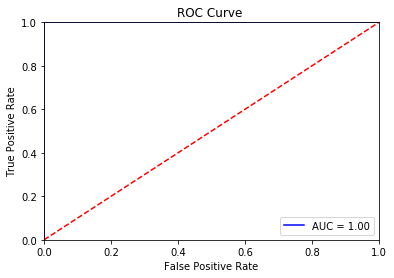

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df_randomm, y_mushroom, test_size=0.2)
score = 'accuracy'


# Set the parameters by cross-validation
tuned_parameters = [{
                     'hidden_layer_sizes': [5, 10, 15],
                     'alpha': [0.01],
                     'activation': ["logistic", "relu", "tanh"],
                     'max_iter' : [10,50,100] ,
                     'batch_size' : [100,500]
                  
                     }]

clf = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5)
clf.fit(X_train, y_train)


paramTuning(clf,X_train, y_train,X_test,y_test)

y_scores = clf.predict(X_test)
fpr, tpr, threshold = roc_curve(y_test[:,1], y_scores[:,1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic Random')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve ')
plt.show()

Neural nets with kmeans clustering o/p

In [104]:
estimator = KMeans(n_clusters=25,random_state=10)
estimator.fit(df)
label=[]
print(estimator.labels_)
a={i: np.where(estimator.labels_ == i)[0] for i in range(estimator.n_clusters)}
for j in range(0,25):
    b=y.iloc[a[j],]
    label.append(np.argmax( np.bincount(b)))
features=estimator.cluster_centers_
features=pd.DataFrame(features)

estimator = KMeans(n_clusters=10,random_state=10)
estimator.fit(df_mushroom)
labelm=[]
print(estimator.labels_)
z={h: np.where(estimator.labels_ == h)[0] for h in range(estimator.n_clusters)}
for k in range(0,10):
    c=y.iloc[z[k],]
    labelm.append(np.argmax( np.bincount(c)))
featuresm=estimator.cluster_centers_
featuresm=pd.DataFrame(featuresm)



[15 15 15 ... 12 12 12]
[5 3 3 ... 8 1 8]


# Tuning  parameters for precision

Best parameters set found on development set:

{'activation': 'relu', 'alpha': 0.01, 'batch_size': 500, 'hidden_layer_sizes': 15, 'max_iter': 100}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5




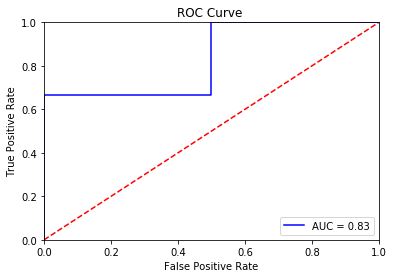

In [111]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2)
score = 'accuracy'


# Set the parameters by cross-validation
tuned_parameters = [{
                     'hidden_layer_sizes': [5, 10, 15],
                     'alpha': [0.01],
                     'activation': ["logistic", "relu", "tanh"],
                     'max_iter' : [10,50,100] ,
                     'batch_size' : [100,500]
                  
                     }]

clf = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5)
clf.fit(X_train, y_train)


paramTuning(clf,X_train, y_train,X_test,y_test)

y_scores = clf.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic Random')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve ')
plt.show()

# Tuning  parameters for precision

Best parameters set found on development set:

{'activation': 'logistic', 'alpha': 0.01, 'batch_size': 100, 'hidden_layer_sizes': 5, 'max_iter': 50}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2




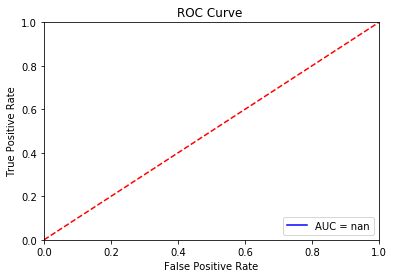

In [114]:
X_train, X_test, y_train, y_test = train_test_split(featuresm, labelm, test_size=0.2)
score = 'accuracy'


# Set the parameters by cross-validation
tuned_parameters = [{
                     'hidden_layer_sizes': [5, 10, 15],
                     'alpha': [0.01],
                     'activation': ["logistic", "relu", "tanh"],
                     'max_iter' : [10,50,100] ,
                     'batch_size' : [100,500]
                  
                     }]

clf = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5)
clf.fit(X_train, y_train)


paramTuning(clf,X_train, y_train,X_test,y_test)

y_scores = clf.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic Random')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve ')
plt.show()

neural networks with EM o/p

In [117]:
gmm = GaussianMixture(n_components=20, covariance_type='full').fit(df)
labelEM=[]
print(gmm.predict(df))
e={f: np.where(gmm.predict(df) == f)[0] for f in range(20)}
for j in range(0,20):
    g=y.iloc[e[j],]
    labelEM.append(np.argmax( np.bincount(g)))
featuresEM=gmm.means_
featuresEM=pd.DataFrame(featuresEM)

gmm = GaussianMixture(n_components=15, covariance_type='full').fit(df_mushroom)
labelEMM=[]
print(gmm.predict(df_mushroom))
e={f: np.where(gmm.predict(df_mushroom) == f)[0] for f in range(15)}
for j in range(0,15):
    g=y.iloc[e[j],]
    labelEMM.append(np.argmax( np.bincount(g)))
featuresEMM=gmm.means_
featuresEMM=pd.DataFrame(featuresEMM)



[19 19 19 ... 13 13 13]
[3 5 5 ... 9 4 9]


# Tuning  parameters for precision

Best parameters set found on development set:

{'activation': 'logistic', 'alpha': 0.01, 'batch_size': 500, 'hidden_layer_sizes': 15, 'max_iter': 10}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.00      0.00      0.00         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4




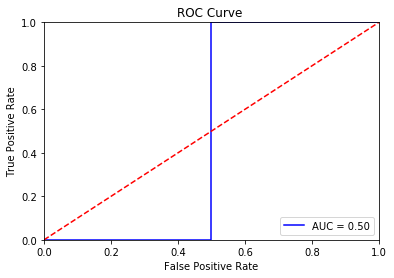

In [122]:
X_train, X_test, y_train, y_test = train_test_split(featuresEM, labelEM, test_size=0.2)
score = 'accuracy'


# Set the parameters by cross-validation
tuned_parameters = [{
                     'hidden_layer_sizes': [5, 10, 15],
                     'alpha': [0.01],
                     'activation': ["logistic", "relu", "tanh"],
                     'max_iter' : [10,50,100] ,
                     'batch_size' : [100,500]
                  
                     }]

clf = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5)
clf.fit(X_train, y_train)


paramTuning(clf,X_train, y_train,X_test,y_test)

y_scores = clf.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic Random')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve ')
plt.show()

# Tuning  parameters for precision

Best parameters set found on development set:

{'activation': 'tanh', 'alpha': 0.01, 'batch_size': 500, 'hidden_layer_sizes': 5, 'max_iter': 100}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3




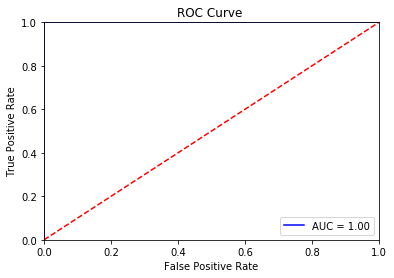

In [119]:
X_train, X_test, y_train, y_test = train_test_split(featuresEMM, labelEMM, test_size=0.2)
score = 'accuracy'


# Set the parameters by cross-validation
tuned_parameters = [{
                     'hidden_layer_sizes': [5, 10, 15],
                     'alpha': [0.01],
                     'activation': ["logistic", "relu", "tanh"],
                     'max_iter' : [10,50,100] ,
                     'batch_size' : [100,500]
                  
                     }]

clf = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5)
clf.fit(X_train, y_train)


paramTuning(clf,X_train, y_train,X_test,y_test)

y_scores = clf.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic Random')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve ')
plt.show()